In [1]:
from fastai.tabular.all import *

In [2]:
# Define the path to your data folder
path = Path("../text/")

In [3]:
# Read CSV files into TabularPandas
train_df = pd.read_csv(path/"train.csv").drop(columns=['game_no','ply_no'])
valid_df = pd.read_csv(path/"valid.csv").drop(columns=['game_no','ply_no'])

train_df

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,result
0,-4,-3,-2,-5,-6,-2,-3,-4,-1,-1,...,1,4,3,2,5,6,2,3,4,1
1,-4,-3,-2,-5,-6,-2,-3,-4,-1,-1,...,1,4,3,2,5,6,2,3,4,0
2,-4,-3,-2,-5,-6,-2,-3,-4,-1,-1,...,1,4,3,2,5,6,2,3,4,1
3,-4,-3,-2,-5,-6,-2,0,-4,-1,-1,...,1,4,3,2,5,6,2,3,4,0
4,-4,-3,-2,-5,-6,-2,-3,-4,-1,-1,...,1,4,3,2,5,6,2,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26559,0,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,1
26560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26561,0,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
# Extract column names
feature_names = train_df.columns.tolist()[:-1]

# Display the extracted column names
print(feature_names)

['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47', 'f_48', 'f_49', 'f_50', 'f_51', 'f_52', 'f_53', 'f_54', 'f_55', 'f_56', 'f_57', 'f_58', 'f_59', 'f_60', 'f_61', 'f_62', 'f_63', 'f_64']


In [5]:
# Load data into TabularDataLoaders directly from CSV files
procs = [Categorify, FillMissing, Normalize]  # Adjust based on your needs

# Assuming the dependent variable column is named 'target' in your CSV files
dep_var = 'result'

# Define your categorical and continuous variable names
cat_names = []  # List of categorical variable names
cont_names = feature_names  # List of continuous variable names

In [6]:
full_df = pd.concat([train_df, valid_df], ignore_index=True)

In [7]:
# Use IndexSplitter to create a custom split
train_idx = range(len(train_df))  # For example, use the first train_df rows for training
valid_idx = range(len(train_df), len(full_df))  # Use the remaining rows for validation
#splits = IndexSplitter(valid_idx)(range_of(full_df))
splits = RandomSplitter(valid_pct=0.2)(range_of(full_df))  # Adjust the validation percentage as needed

to = TabularPandas(full_df, procs=procs, cat_names=cat_names, cont_names=cont_names, y_names=dep_var, splits=splits, y_block = CategoryBlock)

# Create the `TabularDataLoaders` with the custom split
bsize = 64
dls = to.dataloaders(bs=bsize)#, splits=splits)

In [8]:
print(len(dls.train)*bsize,train_df.shape[0])
print(len(dls.valid)*bsize,valid_df.shape[0])

25536 26563
6400 5399


In [9]:
get_emb_sz(dls)

[]

SuggestedLRs(valley=0.0010000000474974513)

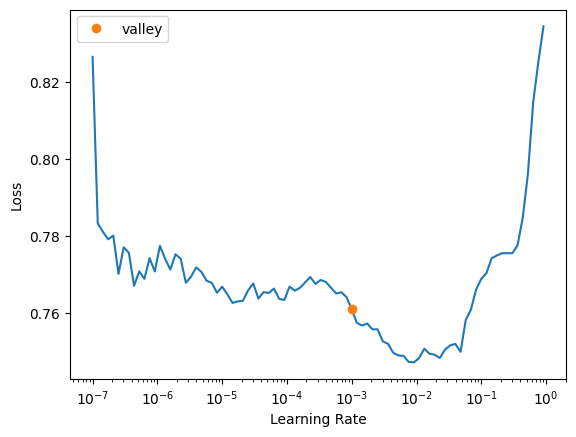

In [10]:
# Define your model architecture
# For example, a basic neural network with two layers
layers = [200, 100, 100]  # Adjust the number of nodes in each layer as needed
model = TabularModel(emb_szs=get_emb_sz(dls), n_cont=len(dls.cont_names), out_sz=1, layers=layers, ps=[0.001, 0.01])

# Create a TabularLearner
learn = tabular_learner(dls, layers=layers, metrics=error_rate)

# Find a suitable learning rate
learn.lr_find()

In [11]:
# Train the model
learn.fit_one_cycle(12, lr_max=1e-2)

epoch,train_loss,valid_loss,error_rate,time


In [12]:
# Train the model
learn.fit_one_cycle(1, lr_max=1e-2)

epoch,train_loss,valid_loss,error_rate,time


In [13]:
# Train the model
learn.fit_one_cycle(1, lr_max=1e-2)

epoch,train_loss,valid_loss,error_rate,time


In [14]:
learn.show_results()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,result,result_pred
0,-0.838052,0.556796,-0.583524,-1.110457,0.845745,-1.428248,0.940028,-1.987689,-0.501712,-0.356709,-0.355593,-0.279613,-1.641759,-0.188164,-0.056333,-0.300063,0.278179,0.290445,-1.653260,0.334676,0.338048,0.622682,0.353872,0.272939,0.175220,-0.001358,-1.780373,0.236481,-0.669045,0.139786,0.016954,0.072635,-0.163560,0.024681,1.783907,-0.176253,0.705849,-0.110464,0.004849,-0.061027,-0.274462,-0.268824,1.655277,-0.309302,-0.317551,1.27518,-0.322756,-0.251032,0.486892,0.353665,0.354701,0.287210,-0.440928,0.195440,0.063503,0.300077,0.821224,-0.57125,0.580859,1.084669,-0.861872,1.430920,1.257535,-0.853320,1.0,1.0
1,1.134697,0.556796,0.663871,0.929574,-0.572682,0.813121,0.940028,0.835019,-0.501712,-0.356709,0.455587,0.434643,0.450708,-4.987041,-0.056333,0.687530,0.278179,0.290445,-0.179148,0.334676,0.338048,-0.001905,-0.596402,0.272939,0.175220,-0.001358,1.239404,-0.666030,0.201875,0.139786,0.016954,0.072635,-0.163560,1.222216,-3.180774,0.717950,-0.150995,-0.110464,1.029585,-0.061027,-0.274462,-0.268824,-0.520353,4.186406,1.570991,-0.57798,-0.322756,-0.251032,0.486892,-0.727413,-0.448995,-0.424759,-0.440928,0.195440,0.063503,-2.683191,0.821224,-0.57125,-0.670621,-0.928322,-0.861872,2.555306,-2.781782,-0.853320,0.0,0.0
2,1.134697,0.556796,0.663871,0.929574,0.845745,0.813121,0.940028,0.835019,0.803351,-0.356709,0.455587,0.434643,-3.734226,-0.188164,0.847328,0.687530,-1.125895,0.290445,0.557909,0.334676,0.338048,0.622682,0.353872,0.272939,0.175220,-0.001358,0.232811,0.236481,-0.669045,2.153491,0.016954,0.072635,-0.163560,0.024681,0.790971,-0.176253,-0.150995,-0.110464,0.004849,-0.061027,-0.274462,-0.268824,0.204857,-0.309302,0.626720,-1.81342,-0.322756,-0.251032,0.486892,-0.727413,-0.448995,-0.424759,-0.440928,0.195440,-4.449487,-4.672037,-1.150068,-0.57125,-0.670621,-0.928322,1.243508,1.430920,-0.945729,-0.853320,0.0,0.0
3,1.134697,0.556796,0.663871,0.929574,0.845745,0.813121,0.940028,0.835019,-0.501712,0.740098,0.455587,0.434643,0.450708,-3.067491,-0.056333,0.687530,0.278179,0.290445,0.557909,0.334676,0.338048,0.622682,0.353872,-0.935764,0.175220,-0.001358,-0.773781,-5.178589,0.201875,0.139786,0.016954,0.072635,1.099573,1.222216,-0.201966,-0.176253,-0.150995,-0.110464,0.004849,-0.061027,-0.274462,-0.268824,0.204857,-0.309302,-0.317551,0.03974,-0.322756,-0.251032,4.314469,-0.727413,-2.860082,-0.424759,-0.440928,-0.745512,0.063503,0.300077,-1.150068,-0.57125,-0.670621,-0.928322,-0.861872,-0.817851,1.257535,-0.853320,1.0,0.0
4,1.134697,0.556796,0.663871,0.929574,0.845745,0.813121,0.940028,0.835019,-0.501712,-0.356709,-4.411496,0.434643,0.450708,0.771611,0.847328,0.687530,0.278179,0.290445,-0.179148,0.334676,0.338048,0.622682,0.353872,-0.935764,0.175220,-0.001358,0.232811,0.236481,0.201875,0.139786,-1.025156,0.072635,-0.163560,0.024681,0.790971,0.717950,2.419535,-0.110464,0.004849,-5.215330,-0.274462,-0.268824,-0.520353,-0.309302,-0.317551,-0.57798,-0.322756,-0.251032,0.486892,0.353665,-0.448995,-0.424759,-0.440928,-0.745512,-0.839095,-0.694346,-1.150068,-0.57125,3.083819,-0.928322,-0.861872,-0.817851,-0.945729,-0.853320,0.0,0.0
5,1.134697,0.556796,0.663871,0.113562,0.845745,0.813121,0.940028,0.835019,-0.501712,0.740098,0.455587,0.434643,0.450708,0.771611,0.847328,0.687530,0.278179,0.290445,0.557909,0.334676,0.338048,0.622682,0.353872,0.272939,0.175220,-0.001358,0.232811,0.236481,0.201875,2.153491,0.016954,0.072635,-0.163560,0.024681,-0.201966,-0.176253,-0.150995,-6.141536,0.004849,-1.349603,-0.274462,-0.268824,-0.520353,-0.309302,-0.317551,-0.57798,-4.088180,-0.251032,0.486892,-0.727413,0.354701,-0.424759,-0.440928,-0.745512,-0.839095,-0.694346,-1.150068,-0.57125,-0.670621,1.487267,-0.861872,-0.817851,-0.945729,1

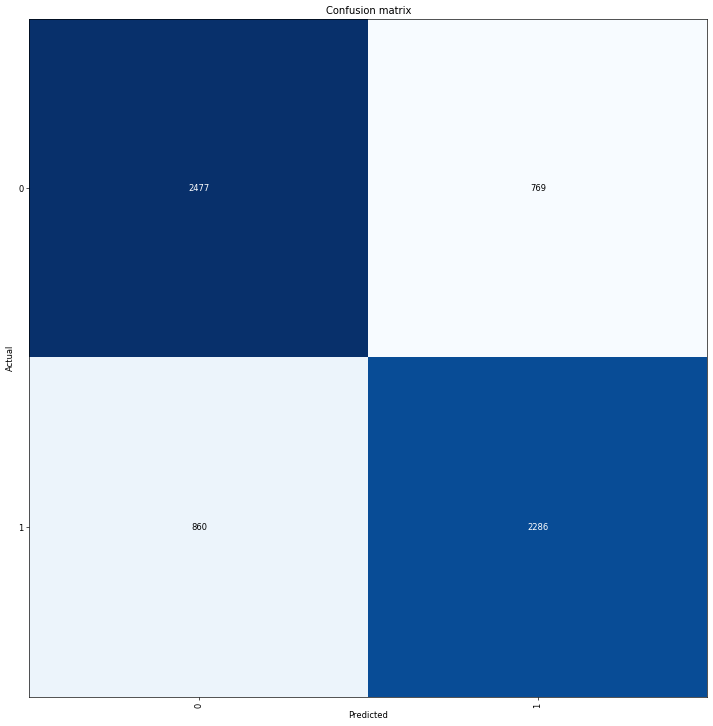

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)